<a href="https://colab.research.google.com/github/mabataki2/AI-Class/blob/main/Week6/digits_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# digits CNN으로 학습 시키기.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. 데이터 불러오기
digits = datasets.load_digits()
X = digits.images  # (1797, 8, 8)
y = digits.target  # (1797, )



In [22]:
# 2. 데이터 전처리
# CNN 입력 형태에 맞게 (샘플 수, 8, 8, 1) 로 reshape
X = X.reshape(-1, 8, 8, 1)

# 픽셀값 정규화 (0~1)
X = X / 16.0  # digits dataset의 픽셀값 범위는 0~16


In [23]:
# one-hot 인코딩
y_cat = to_categorical(y, 10)

y_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)


In [25]:
# 3. CNN 모델 정의
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(8,8,1), padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [26]:
# 4. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
# 5. 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.1297 - loss: 2.2929 - val_accuracy: 0.5521 - val_loss: 2.1819
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2773 - loss: 2.1403 - val_accuracy: 0.8160 - val_loss: 1.6103
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5004 - loss: 1.5771 - val_accuracy: 0.8472 - val_loss: 0.7992
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6756 - loss: 0.9752 - val_accuracy: 0.8472 - val_loss: 0.5017
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7852 - loss: 0.6962 - val_accuracy: 0.8958 - val_loss: 0.3421
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8266 - loss: 0.5509 - val_accuracy: 0.9271 - val_loss: 0.2450
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8713 - loss: 0.4173 - val_accuracy: 0.9201 - val_loss: 0.2302
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8878 - loss: 0.3550 - val_accuracy: 0.9479 - val_los

In [28]:
# 6. 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 정확도: {test_acc:.4f}")


테스트 정확도: 0.9861


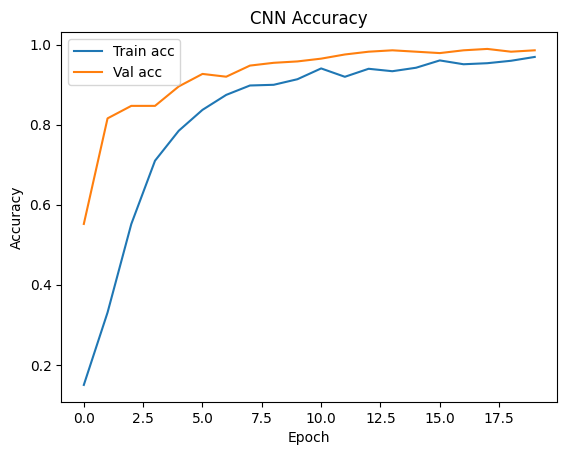

In [29]:
# 7. 학습 과정 시각화
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title("CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 아래 그래프를 보면 10 Epoch에 도달했을 때, val acc와 train acc간의 차이가 줄어들고, 20 이후에는 거의 수렴하여
# 정확도가 높아진 것을 확인할 수 있다.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


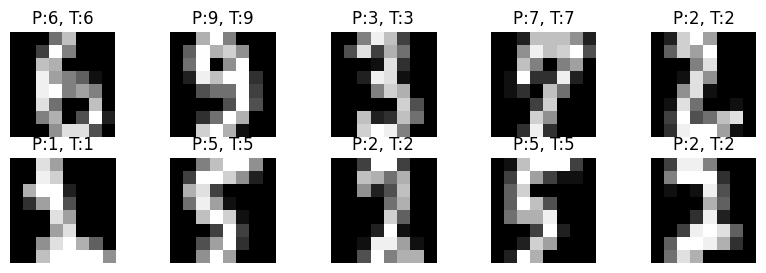

In [30]:
# 8. 예측 예시 시각화
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(10,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"P:{y_pred[i]}, T:{y_true[i]}")
    plt.axis('off')
plt.show()